<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_Stats/Stats_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 統計的仮説検定（1変数の母平均に関する検定）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=9dcbab17f67aa6d03e8fed50f10f90fb57e400c34f931fc11924a09758d4f725
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


仮説を立て、標本観察によってその正誤を検証し、結論を導く方法を**統計的仮説検定**といいます。  

意思決定をする上で重要な役割を果たします。

## 仮説検定のステップ
仮説検定のステップは簡単に言うと以下の通りです。

①帰無仮説と対立仮説を立てる  
②帰無仮説のもとで標本観察を行う  
③帰無仮説を棄却できるかどうかを確認する

### 帰無仮説と対立仮説を立てる  

具体例でみてみましょう。  
  
Aさんが所属している研究室($15$人)の睡眠時間は平均$420$分、不偏分散は$900$(=$30^2$)分です。  
この大学の学生の睡眠時間は$468$分といえるのか、判断したいとします。

検定を行うため立てる仮説のことを**帰無仮説**といいます。  
最初に立てた仮説は否定することを想定して立てます。

例に当てはめて考えます。  
「この大学の学生の睡眠時間は$468$分である」という（**帰無**）**仮説**を立てます。  
この仮説が否定できたとき、2群の平均睡眠時間の間には何かしら違いがある、といえます。

帰無仮説に対する仮説のことを**対立仮説**といいます。  
帰無仮説が否定された場合に成立します。  

このように仮説を捨てることを**棄却**といいます。

ここまでの流れをまとめると以下のようになります。  

帰無仮説$H_0$：「この大学の学生の睡眠時間は$468$分である」  
対立仮説$H_1$：「この大学の学生の睡眠時間は$468$分ではない」

最初から対立仮説を立ててしまうと、色々なケースが想定されるため、肯定するのが難しくなってしまいます。  
そのため、「差がない」という一つのケースだけ否定しています。

### 帰無仮説のもとで標本観察を行う    

帰無仮説が成り立つものとして標本の統計量を計算します。  
（この統計量は特に**検定統計量**と呼ばれます）

この統計量の値が、帰無仮説が正しいとは言い難い領域に入っているかどうかを確認し、  
もし入っていたら帰無仮説を否定することができます。

この領域のことを**棄却域**といいます  
（そうではない領域を**採択域**といいます）。

例に当てはめて考えます。  
今回は母分散が分かっていないので、標本の不偏分散を用いて$t$値を導出します。

### 帰無仮説を棄却できるかどうかを確認する

**有意水準**が帰無仮説を棄却する基準となる確率になります。これを事前に設定します。  
$5$%に設定することが多いです。

※有意水準：めったに起こらないことが起こる確率

帰無仮説が成り立つものとしたとき、  
その検定統計量が得られる確率のことを **$p$値** といいます。



$p$値が有意水準より大きくなったときは、帰無仮説を棄却することはできません。  

このときは帰無仮説を採択できるわけではなく、  
あくまで「対立仮説が正しいと結論づけられない」ということしか言えません。

反対に、$p$値が有意水準より小さくなったときは、帰無仮説を棄却し、対立仮説を採択します。

例に当てはめて考えます。  
②で導出した$t$値と、有意水準に基づく$t$値を比較し、棄却が必要かどうか決めます。

## 両側検定と片側検定


帰無仮説$H_0$を「この大学の学生の睡眠時間は$468$分である」としたときは、  
3通りの対立仮説$H_1$が考えられます。

下の3つの標準正規分布では、3つの対立仮説に対応する棄却域を示しています。  
青く塗りつぶしてあるところが棄却域です。

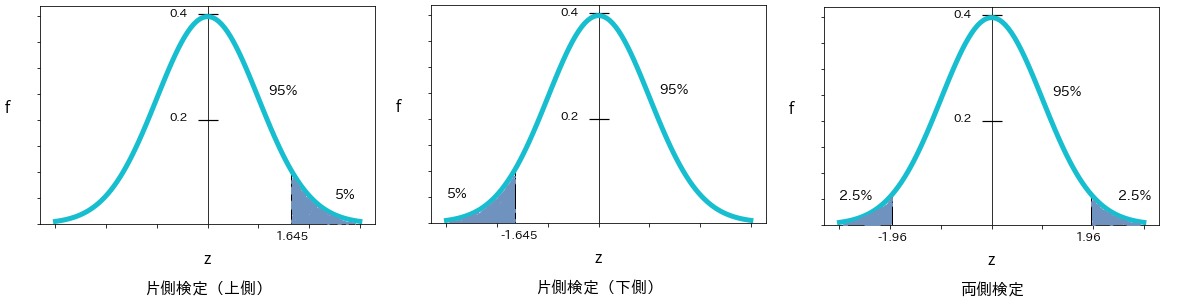

標準正規分布の内、左2つにあたるものは**片側検定**です。  
どの方向に変化しているのかを示したいときに行います。

例に当てはめて考えます。  
対立仮説$H_1$を「この大学の学生の睡眠時間は$468$分より長い」としたときは、  
**片側検定（上側）**を行います。  
対立仮説$H_1$を「この大学の学生の睡眠時間は$468$分より短い」としたときは、  
**片側検定（下側）**を行います。 


標準正規分布の内、一番右にあたるものは**両側検定**です。  
変化しているのかどうかを示したいときに行います。

例に当てはめて考えます。  
対立仮説$H_1$を「この大学の学生の睡眠時間は$468$分ではない」としたときは、  
**両側検定**を行います。 


検定の目的に合わせて使い分けるようにしましょう。

## Pythonによる仮説検定

実際に手計算で解くのは結構手間なので、平均睡眠時間についてPythonで仮説検定しましょう。

In [2]:
μ=468
print("母平均は{}（分）です".format(μ))

n=15
print("標本の大きさは{}（人）です".format(n))

x=420
print("標本平均は{}（分）です".format(x))

s=30
print("不偏分散の平方根は{}（分）です".format(s))

print("有意水準5%")

母平均は468（分）です
標本の大きさは15（人）です
標本平均は420（分）です
不偏分散の平方根は30（分）です
有意水準5%


In [3]:
# 大学の学生の平均睡眠時間は468分
print("H0 : μ＝{}(分) [帰無仮説]".format(μ)) 
   
# 大学の学生の平均睡眠時間は468分ではない
print("H1 : μ≠{}(分) [対立仮説]".format(μ))

H0 : μ＝468(分) [帰無仮説]
H1 : μ≠468(分) [対立仮説]


In [4]:
# Pythonによる導出方法
ty = float(Decimal(str(t.ppf(0.975, n-1))).quantize(Decimal('0.001'),
                                                    rounding=ROUND_HALF_UP))
print(f"有意水準のt値:±{ty}")  # 両側検定なのでt値は2つ

tk = (x-μ)/(s/np.sqrt(n))  # 検定統計量をt値にする
tk = float(Decimal(str(tk)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{tk}")

有意水準のt値:±2.145
検定統計量のt値:-6.197


In [5]:
if tk<0:
  typ = float(Decimal(str(t(n-1).cdf(-ty)*100)).quantize(Decimal('0.001'), 
                                                         rounding=ROUND_HALF_UP))
  print(f"有意水準：{typ}%")    # 左側の棄却域の面積
  tkp = float(Decimal(str(t(n-1).cdf(tk)*100)).quantize(Decimal('0.001'),
                                                        rounding=ROUND_HALF_UP))
  print(f"p値：{tkp}%")
elif tk>=0:
  typ = float(Decimal(str(t(n-1).sf(ty)*100)).quantize(Decimal('0.001'),
                                                       rounding=ROUND_HALF_UP))
  print(f"有意水準：{typ}%")    # 右側の棄却域の面積
  tkp = float(Decimal(str(t(n-1).sf(tk)*100)).quantize(Decimal('0.001'),
                                                       rounding=ROUND_HALF_UP))
  print(f"p値：{tkp}%")

有意水準：2.499%
p値：0.001%


In [6]:
print("p値が有意水準より小さくなったので、帰無仮説を棄却し、対立仮説を採択する")
print("したがって、大学の学生の平均睡眠時間は468分であるとはいえない")

p値が有意水準より小さくなったので、帰無仮説を棄却し、対立仮説を採択する
したがって、大学の学生の平均睡眠時間は468分であるとはいえない


ここで手計算でも行えるように、$p$値を求めない別解も示します。  
Pythonで求めていますが、適宜置き換えてください。

In [7]:
# 別解
ty = float(Decimal(str(t.ppf(0.975, n-1))).quantize(Decimal('0.001'),
                                                    rounding=ROUND_HALF_UP))
print(f"有意水準のt値:{ty}")    # 両側検定なのでt値は2つ

# 下方信頼限界 , 上方信頼限界
x1,x2 = stats.t.interval(alpha=0.95,loc=μ,scale=s/np.sqrt(n),df=n-1)    
x1 = Decimal(str(x1)).quantize(Decimal('0.00001'), rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.00001'), rounding=ROUND_HALF_UP)

print("xの下限値は{}(人)".format(x1))
print("xの上限値は{}(人)".format(x2))  # 実際は標本平均が母平均を下回ることは明らかなので不要

有意水準のt値:2.145
xの下限値は451.38655(人)
xの上限値は484.61345(人)


In [8]:
print("棄却域は\n{}(人) > x , x > {}(人) である。\n".format(x1,x2))
print("標本平均{}(人)は、棄却域に入るため、\n帰無仮説を棄却し、対立仮説を採択する".format(x))

棄却域は
451.38655(人) > x , x > 484.61345(人) である。

標本平均420(人)は、棄却域に入るため、
帰無仮説を棄却し、対立仮説を採択する


In [9]:
print("したがって、大学の学生の平均睡眠時間は468分であるとはいえない")

したがって、大学の学生の平均睡眠時間は468分であるとはいえない


### 演習① 両側検定

もう一問両側検定の問題を解いてみましょう。  
[こちら](https://bit.ly/3PUeKPD)の問題になります。


In [10]:
μ=25.5
print("母平均は{}（kg）です".format(μ))

n=20
print("標本の大きさは{}（個）です".format(n))

x=25.29
print("標本平均は{}（kg）です".format(x))

s=1.49
print("不偏分散の平方根は{}（kg）です".format(s))

print("有意水準5%")

母平均は25.5（kg）です
標本の大きさは20（個）です
標本平均は25.29（kg）です
不偏分散の平方根は1.49（kg）です
有意水準5%


In [11]:
print("H0 : μ＝{}(kg) [帰無仮説]".format(μ))    # 強力粉の重量は25.5 kgである
print("H1 : μ≠{}(kg) [対立仮説]".format(μ))    # 強力粉の重量は25.5 kgではない

H0 : μ＝25.5(kg) [帰無仮説]
H1 : μ≠25.5(kg) [対立仮説]


In [12]:
# Pythonによる導出方法
ty = float(Decimal(str(t.ppf(0.975, n-1))).quantize(Decimal('0.001'),
                                                    rounding=ROUND_HALF_UP))
print(f"有意水準のt値:±{ty}")    # 両側検定なのでt値は2つ

tk = (x-μ)/(s/np.sqrt(n))    # 検定統計量をt値にする
tk = float(Decimal(str(tk)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{tk}")

有意水準のt値:±2.093
検定統計量のt値:-0.63


In [13]:
if tk<0:
  typ = float(Decimal(str(t(n-1).cdf(-ty)*100)).quantize(Decimal('0.001'),
                                                         rounding=ROUND_HALF_UP))
  print(f"有意水準：{typ}%")    # 左側の棄却域の面積
  tkp = float(Decimal(str(t(n-1).cdf(tk)*100)).quantize(Decimal('0.001'),
                                                        rounding=ROUND_HALF_UP))
  print(f"p値：{tkp}%")
elif tk>=0:
  typ = float(Decimal(str(t(n-1).sf(ty)*100)).quantize(Decimal('0.001'),
                                                       rounding=ROUND_HALF_UP))
  print(f"有意水準：{typ}%")    # 右側の棄却域の面積
  tkp = float(Decimal(str(t(n-1).sf(tk)*100)).quantize(Decimal('0.001'), 
                                                       rounding=ROUND_HALF_UP))
  print(f"p値：{tkp}%")

有意水準：2.5%
p値：26.81%


In [14]:
print("p値が有意水準より大きくなったので、帰無仮説を棄却せず、対立仮説を採択しない")
print("したがって、強力粉の重量は25.5 kgではないとは言えない")

p値が有意水準より大きくなったので、帰無仮説を棄却せず、対立仮説を採択しない
したがって、強力粉の重量は25.5 kgではないとは言えない


In [15]:
# 別解
ty = float(Decimal(str(t.ppf(0.975, n-1))).quantize(Decimal('0.001'),
                                                    rounding=ROUND_HALF_UP))
print(f"有意水準のt値:{ty}")    # 両側検定なのでt値は2つ

# 下方信頼限界 , 上方信頼限界
x1,x2 = stats.t.interval(alpha=0.95,loc=μ,scale=s/np.sqrt(n),df=n-1)    
x1 = Decimal(str(x1)).quantize(Decimal('0.00001'),rounding=ROUND_HALF_UP)
x2 = Decimal(str(x2)).quantize(Decimal('0.00001'),rounding=ROUND_HALF_UP) 

print("xの下限値は{}(kg)".format(x1))
print("xの上限値は{}(kg)".format(x2))  # 実際は標本平均が母平均を下回ることは明らかなので不要

有意水準のt値:2.093
xの下限値は24.80266(kg)
xの上限値は26.19734(kg)


In [16]:
print("棄却域は\n{}(kg) > x , x > {}(kg) である。\n".format(x1,x2))
print("標本平均{}(kg)は、棄却域に入らないため、\n帰無仮説を棄却せず、対立仮説を採択しない".format(x))

棄却域は
24.80266(kg) > x , x > 26.19734(kg) である。

標本平均25.29(kg)は、棄却域に入らないため、
帰無仮説を棄却せず、対立仮説を採択しない


In [17]:
print("したがって、強力粉の重量は25.5 kgではないとは言えない")

したがって、強力粉の重量は25.5 kgではないとは言えない


### 演習② 片側検定（上側）

片側検定の問題を解いてみましょう。  
[こちら](https://bit.ly/3jzwHXC)の問題になります。

In [18]:
μ=21
print("母平均は{}（羽）です".format(μ))

n=10
print("標本の大きさは{}（回）です".format(n))

x=25
print("標本平均は{}（羽）です".format(x))

s=3
print("不偏分散の平方根は{}（羽）です".format(s))

print("有意水準5%")

母平均は21（羽）です
標本の大きさは10（回）です
標本平均は25（羽）です
不偏分散の平方根は3（羽）です
有意水準5%


In [19]:
print("H0 : μ＝{}(羽) [帰無仮説]".format(μ))  # 生息数は平均21である
print("H1 : μ＞{}(羽) [対立仮説]".format(μ))  # 生息数は平均21を超える

H0 : μ＝21(羽) [帰無仮説]
H1 : μ＞21(羽) [対立仮説]


In [20]:
# Pythonによる導出方法
ty = float(Decimal(str(t.ppf(0.95, n-1))).quantize(Decimal('0.001'),
                                                   rounding=ROUND_HALF_UP))
print(f"有意水準のt値:{ty}")  # 片側検定なのでt値は1つ

tk = (x-μ)/(s/np.sqrt(n))  # 検定統計量をt値にする
tk = float(Decimal(str(tk)).quantize(Decimal('0.001'),rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{tk}")

有意水準のt値:1.833
検定統計量のt値:4.216


In [21]:
if tk<0:
  typ = float(Decimal(str(t(n-1).cdf(-ty)*100)).quantize(Decimal('0.001'), 
                                                         rounding=ROUND_HALF_UP))
  print(f"有意水準：{typ}%")    # 左側の棄却域の面積
  tkp = float(Decimal(str(t(n-1).cdf(tk)*100)).quantize(Decimal('0.001'),
                                                        rounding=ROUND_HALF_UP))
  print(f"p値：{tkp}%")
elif tk>=0:
  typ = float(Decimal(str(t(n-1).sf(ty)*100)).quantize(Decimal('0.001'),
                                                       rounding=ROUND_HALF_UP))
  print(f"有意水準：{typ}%")    # 右側の棄却域の面積
  tkp = float(Decimal(str(t(n-1).sf(tk)*100)).quantize(Decimal('0.001'),
                                                       rounding=ROUND_HALF_UP))
  print(f"p値：{tkp}%")

有意水準：5.001%
p値：0.113%


In [22]:
print("p値が有意水準より小さくなったので、帰無仮説を棄却し、対立仮説を採択する")
print("したがって、生息数は平均21を超える")

p値が有意水準より小さくなったので、帰無仮説を棄却し、対立仮説を採択する
したがって、生息数は平均21を超える


In [23]:
# 別解
ty = float(Decimal(str(t.ppf(0.95, n-1))).quantize(Decimal('0.001'),
                                                   rounding=ROUND_HALF_UP))
print(f"有意水準のt値:{ty}")    # 片側検定

# 下方信頼限界 , 上方信頼限界
x1,x2 = stats.t.interval(alpha=0.90,loc=μ,scale=s/np.sqrt(n),df=n-1)    
x1 = Decimal(str(x1)).quantize(Decimal('0.0001'),rounding=ROUND_HALF_UP)

print("xの上限値は{}(羽)".format(x2))

有意水準のt値:1.833
xの上限値は22.7390436226489(羽)


In [24]:
print("棄却域は\nx > {}(羽) である。\n".format(x2))
print("標本平均{}(羽)は、棄却域に入るため、\n帰無仮説を棄却し、対立仮説を採択する".format(x))

棄却域は
x > 22.7390436226489(羽) である。

標本平均25(羽)は、棄却域に入るため、
帰無仮説を棄却し、対立仮説を採択する


In [25]:
print("したがって、生息数は平均21を超える")

したがって、生息数は平均21を超える


### 演習③ 片側検定（下側）

もう一問片側検定の問題を解いてみましょう。  
[こちら](https://bit.ly/3WLOU2j)の問題になります。

In [26]:
μ=2000
print("母平均は{}（時間）です".format(μ))

n=15
print("標本の大きさは{}（個）です".format(n))

x=1900
print("標本平均は{}（時間）です".format(x))

s=150
print("不偏分散の平方根は{}（時間）です".format(s))

print("有意水準5%")

母平均は2000（時間）です
標本の大きさは15（個）です
標本平均は1900（時間）です
不偏分散の平方根は150（時間）です
有意水準5%


In [27]:
print("H0 : μ＝{}(時間) [帰無仮説]".format(μ))    # この電球の寿命は2,000時間である
print("H1 : μ＞{}(時間) [対立仮説]".format(μ))    # この電球の寿命は2,000時間よりも短い

H0 : μ＝2000(時間) [帰無仮説]
H1 : μ＞2000(時間) [対立仮説]


In [28]:
# Pythonによる導出方法
ty = float(Decimal(str(t.ppf(0.95, n-1))).quantize(Decimal('0.001'),
                                                   rounding=ROUND_HALF_UP))
print(f"有意水準のt値:{-ty}")  # 片側検定なのでt値は1つ

tk = (x-μ)/(s/np.sqrt(n))  # 検定統計量をt値にする
tk = float(Decimal(str(tk)).quantize(Decimal('0.001'), rounding=ROUND_HALF_UP))
print(f"検定統計量のt値:{tk}")

有意水準のt値:-1.761
検定統計量のt値:-2.582


In [29]:
if tk<0:
  typ = float(Decimal(str(t(n-1).cdf(-ty)*100)).quantize(Decimal('0.001'),
                                                         rounding=ROUND_HALF_UP))
  print(f"有意水準：{typ}%")    # 左側の棄却域の面積
  tkp = float(Decimal(str(t(n-1).cdf(tk)*100)).quantize(Decimal('0.001'), 
                                                        rounding=ROUND_HALF_UP))
  print(f"p値：{tkp}%")
elif tk>=0:
  typ = float(Decimal(str(t(n-1).sf(ty)*100)).quantize(Decimal('0.001'),
                                                       rounding=ROUND_HALF_UP))
  print(f"有意水準：{typ}%")    # 右側の棄却域の面積
  tkp = float(Decimal(str(t(n-1).sf(tk)*100)).quantize(Decimal('0.001'),
                                                       rounding=ROUND_HALF_UP))
  print(f"p値：{tkp}%")

有意水準：5.003%
p値：1.086%


In [30]:
print("p値が有意水準より小さくなったので、帰無仮説を棄却し、対立仮説を採択する")
print("したがって、この電球の寿命は2,000時間よりも短い")

p値が有意水準より小さくなったので、帰無仮説を棄却し、対立仮説を採択する
したがって、この電球の寿命は2,000時間よりも短い


In [31]:
# 別解
ty = float(Decimal(str(t.ppf(0.95, n-1))).quantize(Decimal('0.001'),
                                                   rounding=ROUND_HALF_UP))
print(f"有意水準のt値:{ty}")    # 片側検定

# 下方信頼限界 , 上方信頼限界
x1,x2 = stats.t.interval(alpha=0.90,loc=μ,scale=s/np.sqrt(n),df=n-1)    
x1 = Decimal(str(x1)).quantize(Decimal('0.0001'), rounding=ROUND_HALF_UP)

print("xの下限値は{}(時間)".format(x1))

有意水準のt値:1.761
xの下限値は1931.7848(時間)


In [32]:
print("棄却域は\n{}(時間) > x である。\n".format(x1))
print("標本平均{}(時間)は、棄却域に入るため、\n帰無仮説を棄却し、対立仮説を採択する".format(x))

棄却域は
1931.7848(時間) > x である。

標本平均1900(時間)は、棄却域に入るため、
帰無仮説を棄却し、対立仮説を採択する


In [33]:
print("したがって、この電球の寿命は2,000時間よりも短い")

したがって、この電球の寿命は2,000時間よりも短い


## Pythonによる仮説検定（高速Ver）

標本が「平均と不偏分散」のセットではなく**標本値**で与えられている場合、  
Pythonでは一瞬で仮説検定を行うことができます。

`todohuken_data.csv`をインポートしてください。

In [48]:
df = pd.read_csv("todohuken_data.csv")
df.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）
0,北海道,北海道地方,473,465,63.4
1,青森県,東北地方,486,470,66.4
2,岩手県,東北地方,477,469,67.6


In [49]:
df_kanto = df[df["地方"] == "関東地方"]
df_kanto.head(3)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）
7,茨城県,関東地方,463,447,71.2
8,栃木県,関東地方,465,455,71.9
9,群馬県,関東地方,464,455,72.1


上のデータフレームは2016年の平均睡眠時間と2021年の運転免許取得率を  
都道府県別に表したものの内、関東地方をまとめたものになります。

### 問題1 
関東地方の男性の平均睡眠時間を`df_kanto`の通りにサンプリングした。  
日本の男性の平均睡眠時間が$450$分であるかどうか検定せよ。

In [36]:
male_sleep = df_kanto["15歳以上の平均睡眠時間（男）"]

In [37]:
μ=450
print("母平均は{}（分）です".format(μ))

n=len(male_sleep)
print("標本の大きさは{}（県）です".format(n))

x=male_sleep.mean()
print("標本平均は{}（分）です".format(x))

s=male_sleep.std()
print("不偏分散の平方根は{}（分）です".format(s))

print("有意水準5%")

母平均は450（分）です
標本の大きさは7（県）です
標本平均は457.7142857142857（分）です
不偏分散の平方根は6.047431568147635（分）です
有意水準5%


In [38]:
print("H0 : μ＝{}(分) [帰無仮説]".format(μ))    # 日本の男性の平均睡眠時間は450分である
print("H1 : μ≠{}(分) [対立仮説]".format(μ))    # 日本の男性の平均睡眠時間は450分ではない

H0 : μ＝450(分) [帰無仮説]
H1 : μ≠450(分) [対立仮説]


Scipyの`stats.ttest_1samp`メソッドを使うと、  
両側検定と片側検定を一発で行うことができます。

In [39]:
tt, pp = stats.ttest_1samp(male_sleep, popmean=450)
print('母平均が450分のt値：'+str(tt))
print('母平均が450分である確率(p値)：'+str(pp*100))

母平均が450分のt値：3.3750000000000036
母平均が450分である確率(p値)：1.4949810458305364


$5$%有意水準としたとき、  
$p$値が$2.5$%以下であるとき**両側検定**で帰無仮説を棄却でき、  
$p$値が$5.0$%以下であるとき**片側検定**で帰無仮説が棄却できます。

今回は$p$値が$2.5$%以下であるので両側検定で帰無仮説を棄却できます。

また、$t$値が正であり、$p$値が$5.0$%以下であることから、  
日本の男性の平均睡眠時間が$450$分より**長い**ということまで分かります。

### 問題2  
関東地方の女性の平均睡眠時間を`df_kanto`の通りにサンプリングした。  
日本の女性の平均睡眠時間が$450$分であるかどうか検定せよ。

In [40]:
female_sleep = df_kanto["15歳以上の平均睡眠時間（女）"]

In [41]:
μ=450
print("母平均は{}（分）です".format(μ))

n=len(female_sleep)
print("標本の大きさは{}（県）です".format(n))

x=female_sleep.mean()
print("標本平均は{}（分）です".format(x))

s=female_sleep.std()
print("不偏分散の平方根は{}（分）です".format(s))

print("有意水準5%")

母平均は450（分）です
標本の大きさは7（県）です
標本平均は449.57142857142856（分）です
不偏分散の平方根は4.429339411136566（分）です
有意水準5%


In [42]:
print("H0 : μ＝{}(分) [帰無仮説]".format(μ))    # 日本の女性の平均睡眠時間は450分である
print("H1 : μ≠{}(分) [対立仮説]".format(μ))    # 日本の女性の平均睡眠時間は450分ではない

H0 : μ＝450(分) [帰無仮説]
H1 : μ≠450(分) [対立仮説]


In [43]:
tt, pp = stats.ttest_1samp(female_sleep, popmean=450)
print('母平均が450分のt値：'+str(tt))
print('母平均が450分である確率(p値)：'+str(pp*100))

母平均が450分のt値：-0.2559960557948681
母平均が450分である確率(p値)：80.65045545190732


今回は$p$値が$5.0$%以下ではないので帰無仮説を棄却できません。



問題1と問題2を通して、男性の方が平均睡眠時間が長いことが立証されました。

### 問題3
関東地方の運転免許保有者割合を`df_kanto`の通りにサンプリングした。  
日本の運転免許保有者割合が$75$%であるかどうか検定せよ。

In [44]:
menkyo_per = df_kanto["運転免許保有者割合（%）"]

In [45]:
μ=75
print("母平均は{}（%）です".format(μ))

n=len(menkyo_per)
print("標本の大きさは{}（県）です".format(n))

x=menkyo_per.mean()
print("標本平均は{}（%）です".format(x))

s=menkyo_per.std()
print("不偏分散の平方根は{}（%）です".format(s))

print("有意水準5%")

母平均は75（%）です
標本の大きさは7（県）です
標本平均は66.07142857142858（%）です
不偏分散の平方根は5.764753329708127（%）です
有意水準5%


In [46]:
print("H0 : μ＝{}(%) [帰無仮説]".format(μ))    # 日本の運転免許保有者割合は75%である
print("H1 : μ≠{}(%) [対立仮説]".format(μ))    # 日本の運転免許保有者割合は75%ではない

H0 : μ＝75(%) [帰無仮説]
H1 : μ≠75(%) [対立仮説]


In [47]:
tt, pp = stats.ttest_1samp(menkyo_per, popmean=75)
print('母平均が75%のt値：'+str(tt))
print('母平均が75%である確率(p値)：'+str(pp*100))

母平均が75%のt値：-4.097795380305145
母平均が75%である確率(p値)：0.6373141122471138


今回は$p$値が$2.5$%以下であるので両側検定で帰無仮説を棄却できます。

また、$t$値が負であり、$p$値が$5.0$%以下であることから、  
日本の運転免許保有者割合が$75$%より**低い**ということまで分かります。

## 補足
最後に、有名Youtuberヨビノリ先生の動画で参考になりそうなものを紹介しておきます。

①[母平均の検定](https://www.youtube.com/watch?v=4ZHcBtLdOQs&list=PLDJfzGjtVLHmx7qMP410-9gx0weC9d90X&index=8)  
